<a href="https://colab.research.google.com/github/Alphambarushimana/Master-thesis-/blob/main/Stock_Price_Prediction_%26_Forecasting_with_LSTM_Mirosoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
#MSFT -https://github.com/Alphambarushimana/Master-thesis-.git
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import yfinance as yf
import torch
import torch.nn as nn

In [78]:
df = pd.read_csv("https://github.com/Alphambarushimana/Master-thesis-/raw/main/MSFT.csv")

In [79]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062686,308160000
1,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063767,133171200
2,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062145,67766400
3,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061065,47894400
4,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.059444,58435200
...,...,...,...,...,...,...,...
9076,2022-03-17,293.290009,295.609985,289.369995,295.220001,291.714264,30816600
9077,2022-03-18,295.369995,301.000000,292.730011,300.429993,296.862366,43390600
9078,2022-03-21,298.890015,300.140015,294.899994,299.160004,295.607452,28351200
9079,2022-03-22,299.799988,305.000000,298.769989,304.059998,300.449249,27599700


In [80]:
 df= df[['Date','Close']]

In [81]:
df

,Date,Close
0,1986-03-14,0.100694
1,1986-03-17,0.102431
2,1986-03-18,0.099826
3,1986-03-19,0.098090
4,1986-03-20,0.095486
...,...,...
9076,2022-03-17,295.220001
9077,2022-03-18,300.429993
9078,2022-03-21,299.160004
9079,2022-03-22,304.059998


In [82]:
import datetime

In [83]:
def str_to_datetime(s):
  split = s.split('-')
  year, month, day= int(split [0]),int(split[1]), int(split[2])
  return datetime.datetime(year=year,month=month, day=day)

  datetime_object=str_to_datetime('18-03-19')
  datetime_object

In [84]:
# want to put in our df

df['Date']= df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-84-831541984769>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']= df['Date'].apply(str_to_datetime)


0      1986-03-14
1      1986-03-17
2      1986-03-18
3      1986-03-19
4      1986-03-20
          ...    
9076   2022-03-17
9077   2022-03-18
9078   2022-03-21
9079   2022-03-22
9080   2022-03-23
Name: Date, Length: 9081, dtype: datetime64[ns]

In [85]:
df.index = df.pop('Date')
df
# maked the date, the index

,Close
Date,
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
1986-03-20,0.095486
...,...
2022-03-17,295.220001
2022-03-18,300.429993
2022-03-21,299.160004


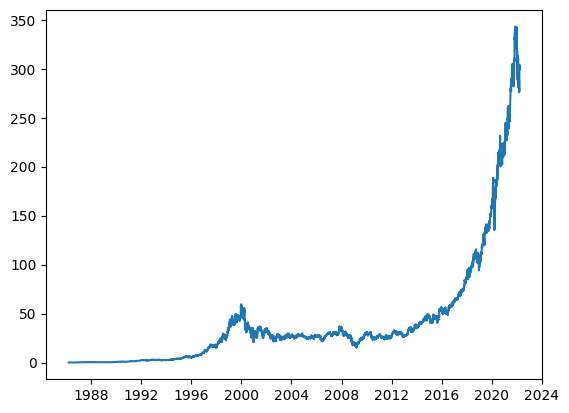

In [86]:
  plt.plot(df.index, df['Close']) # can only make the plot because the the date is -
  # index

In [87]:
# need to compouse it to a supervised learning problem

In [90]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


# I taget -1, -2, -3 har man de 3 tidligere close priser hvor man så target har den pris der er var på target date

In [91]:
from pandas._config import dates
def windowed_df_to_date_x_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:,1:-1]
  X = middle_matrix.reshape((len(dates),middle_matrix.shape[1], 1))

  Y= df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y=windowed_df_to_date_x_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

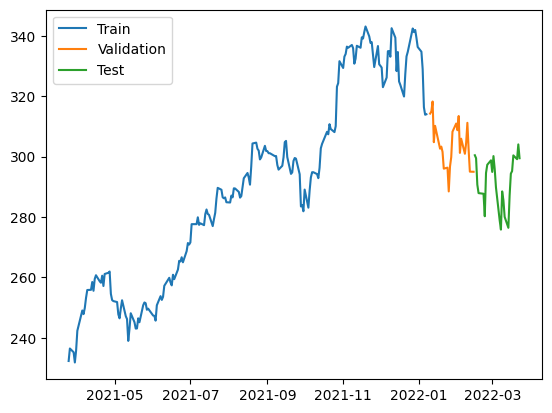

In [93]:
q_80= int(len(dates)*.8) # we are testing the model for 80%
q_90= int(len(dates)* .9) #and for 90%

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])




In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers


model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),# if the number is bigger the model have a bigger chance of overfitting
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error']) # tels os how much we are off

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 4s 101ms/step - loss: 84620.8125 - mean_absolute_error: 289.1519 - val_loss: 92250.2891 - val_mean_absolute_error: 303.6401
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 84311.5625 - mean_absolute_error: 288.6189 - val_loss: 91961.2109 - val_mean_absolute_error: 303.1637
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 84002.2109 - mean_absolute_error: 288.0827 - val_loss: 91564.9219 - val_mean_absolute_error: 302.5094
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 83582.1797 - mean_absolute_error: 287.3534 - val_loss: 91040.2188 - val_mean_absolute_error: 301.6409
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 83051.8594 - mean_absolute_error: 286.4274 - val_loss: 90426.1484 - val_mean_absolute_error: 300.6213
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 82403.1562 - mean_absolute_error: 285.2928 - val_loss: 89607

7/7 [==============================] - 0s 3ms/step


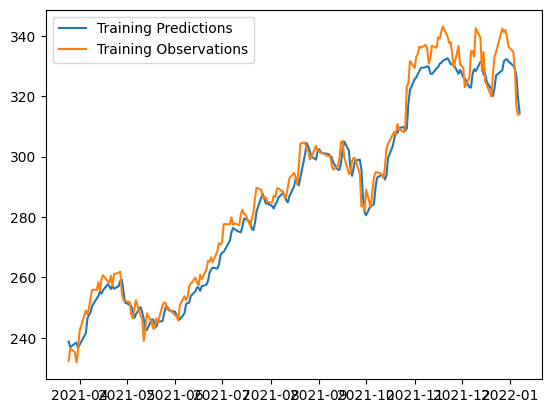

In [102]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 36ms/step


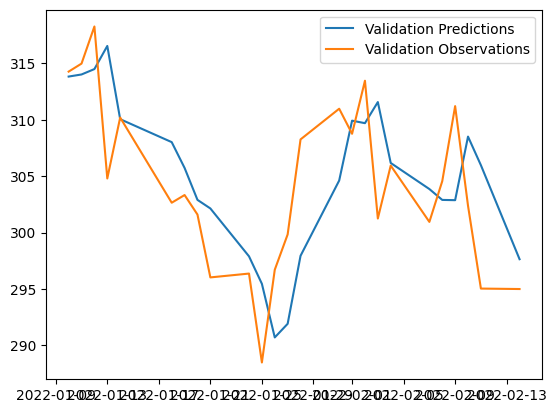

In [103]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 23ms/step


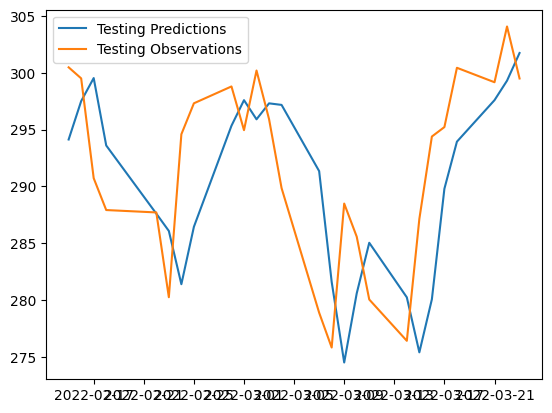

In [104]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

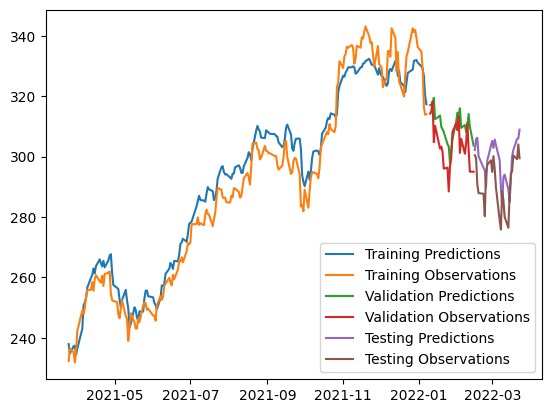

In [100]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [105]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 23ms/step


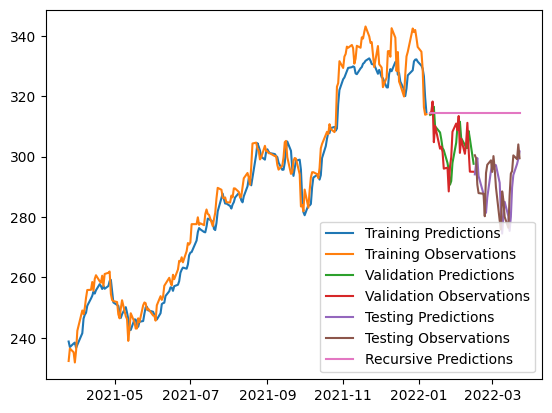

In [106]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])